In [5]:
# For image processing
import cv2
import imutils
import numpy as np
import pandas as pd

# For Math
import math
from scipy.stats import norm

# For path
import os
from pathlib import Path
import glob

# For displaying
from PIL import Image
from IPython.display import display

# For performance
import time
from multiprocessing import Pool, cpu_count

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import imutils

# from time import sleep
from tqdm import tqdm, trange

from pathlib import Path
import pandas as ps

In [2]:
cwd = Path.cwd()
dir_main = Path.cwd().parent

In [6]:
dir_full_db = f'{dir_main}/Data/YGO DB - export_full_db.csv'
df = pd.read_csv(dir_full_db)
df['Staple'].fillna('전용')
def fill_na_with_code(df):
    df['Staple'].fillna('전용')
    for col in df.columns:
        if col != 'Code' and df[col].isnull().any():
            df[col].fillna(df['Code'], inplace=True)
    return df
fill_na_with_code(df)

,Code,Digit,Name_EN,Name_KO,Name_JA,Name_JA_Ruby,Reg,Type,Typo,Pendulum,Staple,Arch,Usage,Possible
0,4007,89631139,Blue-Eyes White Dragon,푸른 눈의 백룡,青眼の白龍,ブルーアイズ・ホワイト・ドラゴン,4007,메인,일반,False,전용,백룡,10,True
1,4007,89631140,Blue-Eyes White Dragon,푸른 눈의 백룡,青眼の白龍,ブルーアイズ・ホワイト・ドラゴン,4007,메인,일반,False,전용,백룡,10,True
2,4007,89631141,Blue-Eyes White Dragon,푸른 눈의 백룡,青眼の白龍,ブルーアイズ・ホワイト・ドラゴン,4007,메인,일반,False,전용,백룡,10,True
3,4007,89631142,Blue-Eyes White Dragon,푸른 눈의 백룡,青眼の白龍,ブルーアイズ・ホワイト・ドラゴン,4007,메인,일반,False,전용,백룡,10,True
4,4007,89631143,Blue-Eyes White Dragon,푸른 눈의 백룡,青眼の白龍,ブルーアイズ・ホワイト・ドラゴン,4007,메인,일반,False,전용,백룡,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12308,18457,96305350,Gold Pride - Captain Carrie,18457,18457,18457,18457,메인,효과,False,전용,Gold Pride,0,False
12309,18458,22390469,Gold Pride - Star Leon,18458,18458,18458,18458,메인,효과,False,전용,Gold Pride,0,False
12310,18459,58884063,Gold Pride - Nytro Blaster,18459,18459,18459,18459,메인,효과,False,전용,Gold Pride,0,False
12311,18460,95283172,Gold Pride - The Crowd Goes Wild!,18460,18460,18460,18460,메인,효과,False,전용,Gold Pride,0,False


In [101]:
db_code = np.asanyarray(df["Code"])
db_digit = np.asarray(df["Digit"])
db_name_ko = np.asarray(df["Name_KO"])
db_type = np.asarray(df['Type'])
db_pen = np.asarray(df['Pendulum'])

# Crop Cards (Standard)

In [28]:
name = '하루 우라라'
ind = np.where(db_name_ko == name)[0][0]
digit = db_digit[ind]
dir_card = f'{dir_main}/YGO_DB/{digit}.jpg'
print(dir_card)

c:\ML_YGO/YGO_DB/14558127.jpg


In [39]:
img_rgb = cv2.imread(dir_card)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

dir_write_gray = f'{dir_main}/Output/std_crop_gray.jpg'
cv2.imwrite(dir_write_gray, img_gray)
img_gray = cv2.imread(dir_write_gray)

dXY = 323
pX = int((421-dXY)*0.5)
pY = 111
top_left = (pX,pY)
bottom_right = (pX + dXY, pY+ dXY)

dir_write_rec = f'{dir_main}/Output/std_crop_rec.jpg'
cv2.rectangle(img_gray, top_left, bottom_right, (0,0,255), 1)
cv2.imwrite(dir_write_rec, img_gray)

dir_write_crop = f'{dir_main}/Output/std_crop_crop.jpg'
img_crop = img_rgb[pY:pY+dXY,pX:pX+dXY]
cv2.imwrite(dir_write_crop, img_crop)

True

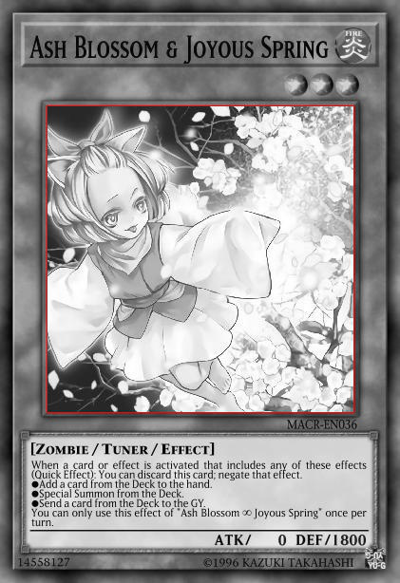

In [40]:
dir_file = dir_write_rec
image=Image.open(dir_file)
o_size = image.size
f = 400
width, height = f, int(f*o_size[1]/o_size[0])
image = image.resize((width, height))
display(image)

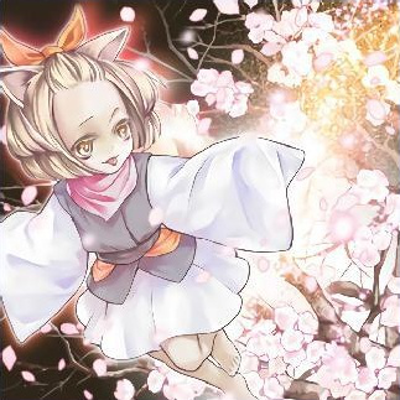

In [41]:
dir_file = dir_write_crop
image=Image.open(dir_file)
o_size = image.size
f = 400
width, height = f, int(f*o_size[1]/o_size[0])
image = image.resize((width, height))
display(image)

# Crop Cards (Pendulum)

In [85]:
name = '아스트로그래프 매지션'
ind = np.where(db_name_ko == name)[0][0]
digit = db_digit[ind]
dir_card = f'{dir_main}/YGO_DB/{digit}.jpg'
print(dir_card)

c:\ML_YGO/YGO_DB/76794549.jpg


In [89]:
img_rgb = cv2.imread(dir_card)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

dir_write_gray = f'{dir_main}/Output/pen_crop_gray.jpg'
cv2.imwrite(dir_write_gray, img_gray)
img_gray = cv2.imread(dir_write_gray)

dX = 367
dY = 270
pX = int((421-dX)*0.5)
pY = 110

top_left = (pX,pY)
bottom_right = (pX + dX, pY+ dY)

dir_write_rec = f'{dir_main}/Output/pen_crop_rec.jpg'
cv2.rectangle(img_gray, top_left, bottom_right, (0,0,255), 1)
cv2.imwrite(dir_write_rec, img_gray)

dir_write_crop = f'{dir_main}/Output/pen_crop_crop.jpg'
img_crop = img_rgb[pY:pY+dY,pX:pX+dX]
cv2.imwrite(dir_write_crop, img_crop)


print(dX, dY, pX, pY)

367 270 27 110


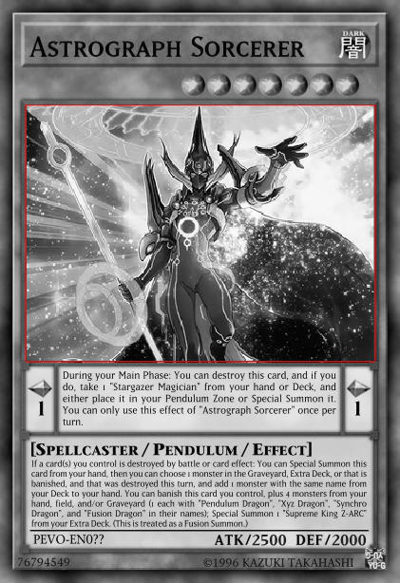

In [87]:
dir_file = dir_write_rec
image=Image.open(dir_file)
o_size = image.size
f = 400
width, height = f, int(f*o_size[1]/o_size[0])
image = image.resize((width, height))
display(image)

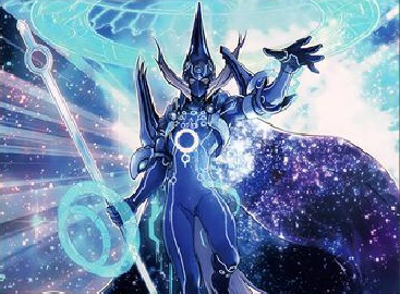

In [88]:
dir_file = dir_write_crop
image=Image.open(dir_file)
o_size = image.size
f = 400
width, height = f, int(f*o_size[1]/o_size[0])
image = image.resize((width, height))
display(image)

# Crop Card (Pendulum - Square)

In [106]:
name = '크로노그래프 매지션'
ind = np.where(db_name_ko == name)[0][0]
digit = db_digit[ind]
dir_card = f'{dir_main}/YGO_DB/{digit}.jpg'
print(dir_card)

c:\ML_YGO/YGO_DB/12289247.jpg


In [107]:
img_rgb = cv2.imread(dir_card)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

dir_write_gray = f'{dir_main}/Output/pen_crop_gray.jpg'
cv2.imwrite(dir_write_gray, img_gray)
img_gray = cv2.imread(dir_write_gray)

dXY = 271
pX = int((421-dXY)*0.5)
pY = 111
top_left = (pX,pY)

bottom_right = (pX + dXY, pY+ dXY)

dir_write_rec = f'{dir_main}/Output/pen_crop_rec.jpg'
cv2.rectangle(img_gray, top_left, bottom_right, (0,0,255), 1)
cv2.imwrite(dir_write_rec, img_gray)

dir_write_crop = f'{dir_main}/Output/pen_crop_crop.jpg'
img_crop = img_rgb[pY:pY+dXY,pX:pX+dXY]
cv2.imwrite(dir_write_crop, img_crop)

True

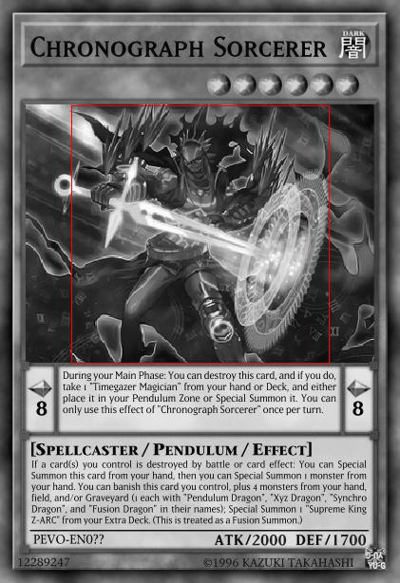

In [108]:
dir_file = dir_write_rec
image=Image.open(dir_file)
o_size = image.size
f = 400
width, height = f, int(f*o_size[1]/o_size[0])
image = image.resize((width, height))
display(image)

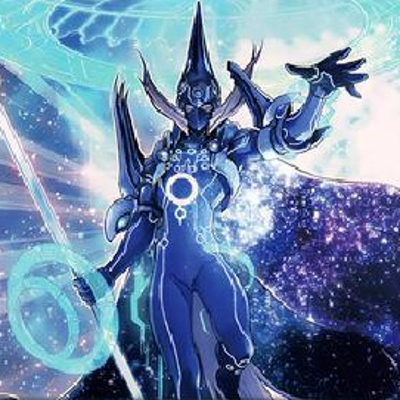

In [105]:
dir_file = dir_write_crop
image=Image.open(dir_file)
o_size = image.size
f = 400
width, height = f, int(f*o_size[1]/o_size[0])
image = image.resize((width, height))
display(image)

# Run

In [91]:
d1 = 367
d2 = 217

In [99]:
for i in range(40,2000):
    mlt = i/367
    if abs(int(d2*mlt)-d2*mlt) <0.0000001:
        print(i)

367
734
1101
1468
1835


In [111]:
for i, digit in enumerate(db_digit):
    dir_card = f'{dir_main}/YGO_DB/{digit}.jpg'
    dir_write_crop = f'{dir_main}/YGO_DB_crop/{digit}.jpg'
    pen = db_pen[i]
    img_rgb = cv2.imread(dir_card)
    if pen:
        dXY = 271
    else:
        dXY = 323
    pX = int((421-dXY)*0.5)
    pY = 111
    top_left = (pX,pY)
    bottom_right = (pX + dXY, pY+ dXY)
    img_crop = img_rgb[pY:pY+dXY,pX:pX+dXY]
    cv2.imwrite(dir_write_crop, img_crop)